In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("final.csv")
R = (df["R1"]+df["R2"]+df["R3"])/3
G = (df["G1"]+df["G2"]+df["G3"])/3
B = (df["B1"]+df["B2"]+df["B3"])/3
# df["R"]=R
df.head()

Unnamed: 0     B1    G1    R1    B2    G2    R2    B3    G3    R3  Label
0           0  209.0  89.0  14.0  17.0  43.0  71.0  27.0  54.0  79.0      1
1           1  214.0  91.0  13.0  33.0  59.0  90.0  23.0  45.0  75.0      1
2           2  228.0  93.0   8.0  25.0  56.0  88.0  18.0  47.0  80.0      1
3           3  226.0  94.0  10.0  44.0  63.0  85.0  49.0  68.0  89.0      1
4           4  224.0  92.0   9.0  16.0  47.0  83.0  25.0  61.0  96.0      1

In [4]:
merge=pd.DataFrame({'R':R, 'G':G,'B':B,'Label':df["Label"]})
merge

R           G           B  Label
0      54.666667   62.000000   84.333333      1
1      59.333333   65.000000   90.000000      1
2      58.666667   65.333333   90.333333      1
3      61.333333   75.000000  106.333333      1
4      62.666667   66.666667   88.333333      1
...          ...         ...         ...    ...
2117  164.000000  113.333333   54.000000      3
2118  152.000000   99.000000   47.333333      3
2119  157.333333   97.333333   41.333333      3
2120  162.000000  102.666667   46.666667      3
2121  154.666667  101.666667   45.666667      3

[2122 rows x 4 columns]

In [4]:
df1=df.loc[:873,:]
df2=df.loc[874:1421,:]
df3=df.loc[1422:,:]

In [17]:
R1 = (df1["R1"]+df1["R2"]+df1["R3"])/3
G1 = (df1["G1"]+df1["G2"]+df1["G3"])/3
B1 = (df1["B1"]+df1["B2"]+df1["B3"])/3

R2 = (df2["R1"]+df2["R2"]+df2["R3"])/3
G2 = (df2["G1"]+df2["G2"]+df2["G3"])/3
B2 = (df2["B1"]+df2["B2"]+df2["B3"])/3

R3 = (df3["R1"]+df3["R2"]+df3["R3"])/3
G3 = (df3["G1"]+df3["G2"]+df3["G3"])/3
B3 = (df3["B1"]+df3["B2"]+df3["B3"])/3

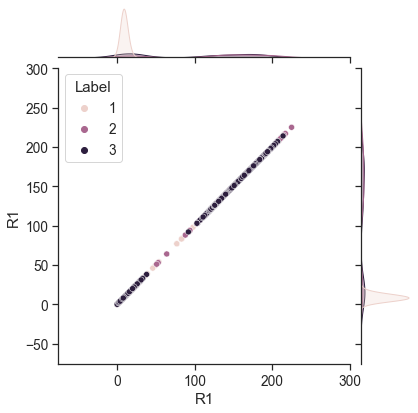

In [29]:
sns.jointplot(data=df, x="R1", y="R1", hue="Label")

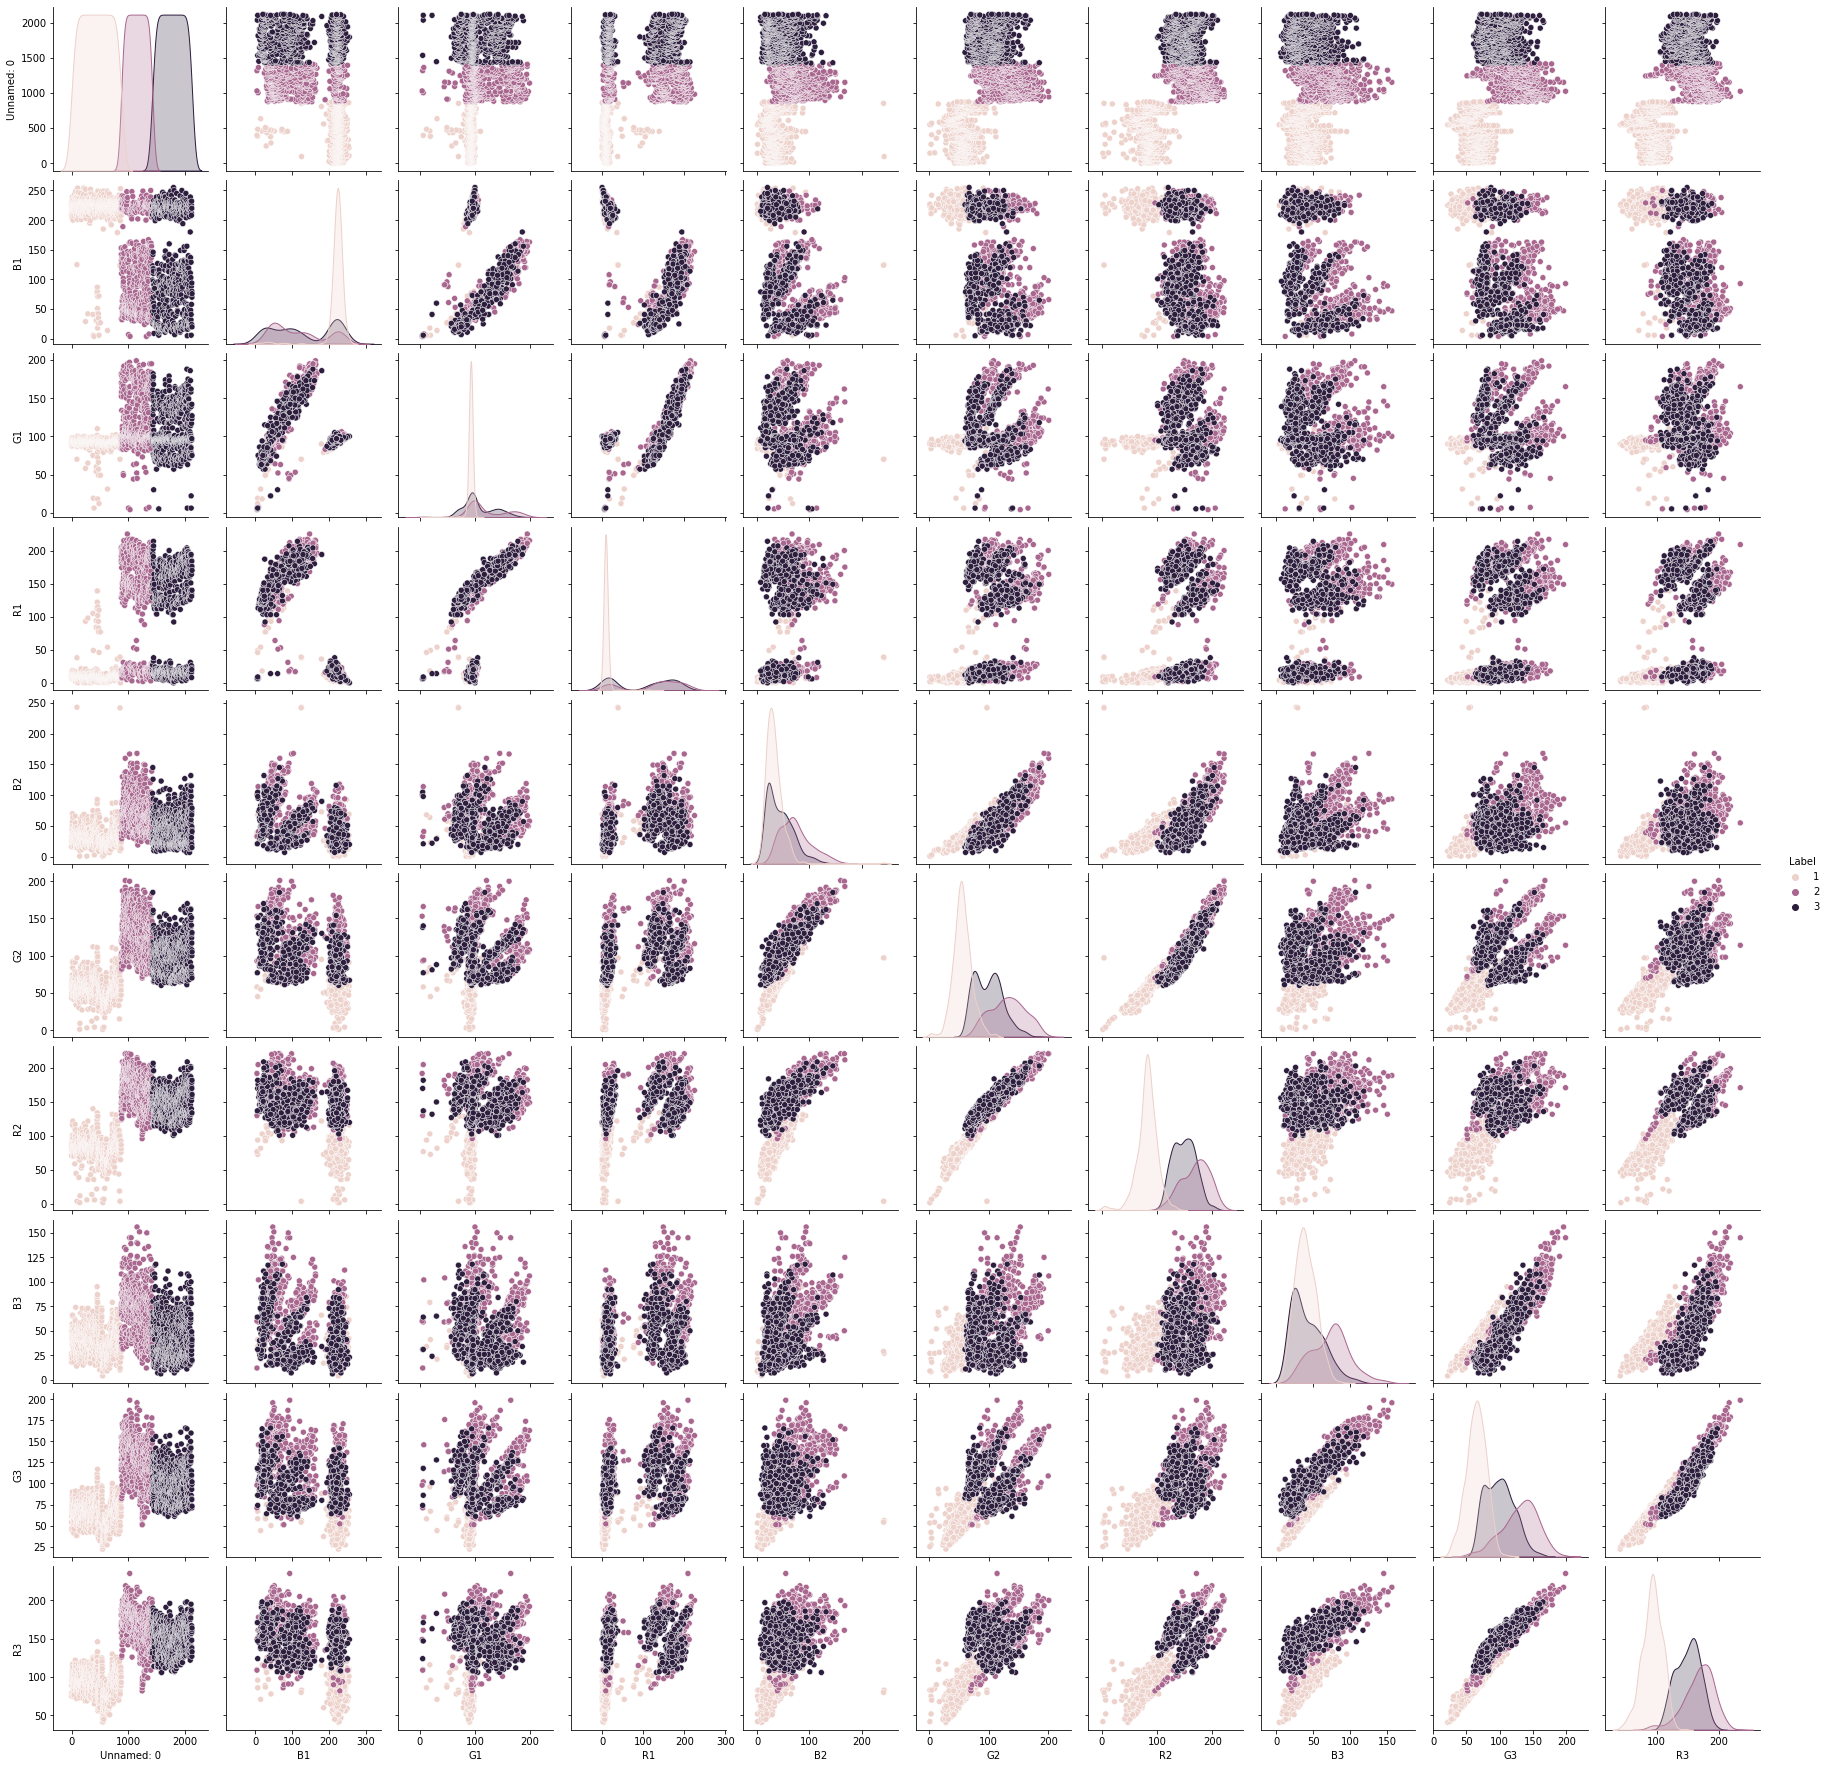

In [25]:
sns.pairplot(data=df, hue="Label")

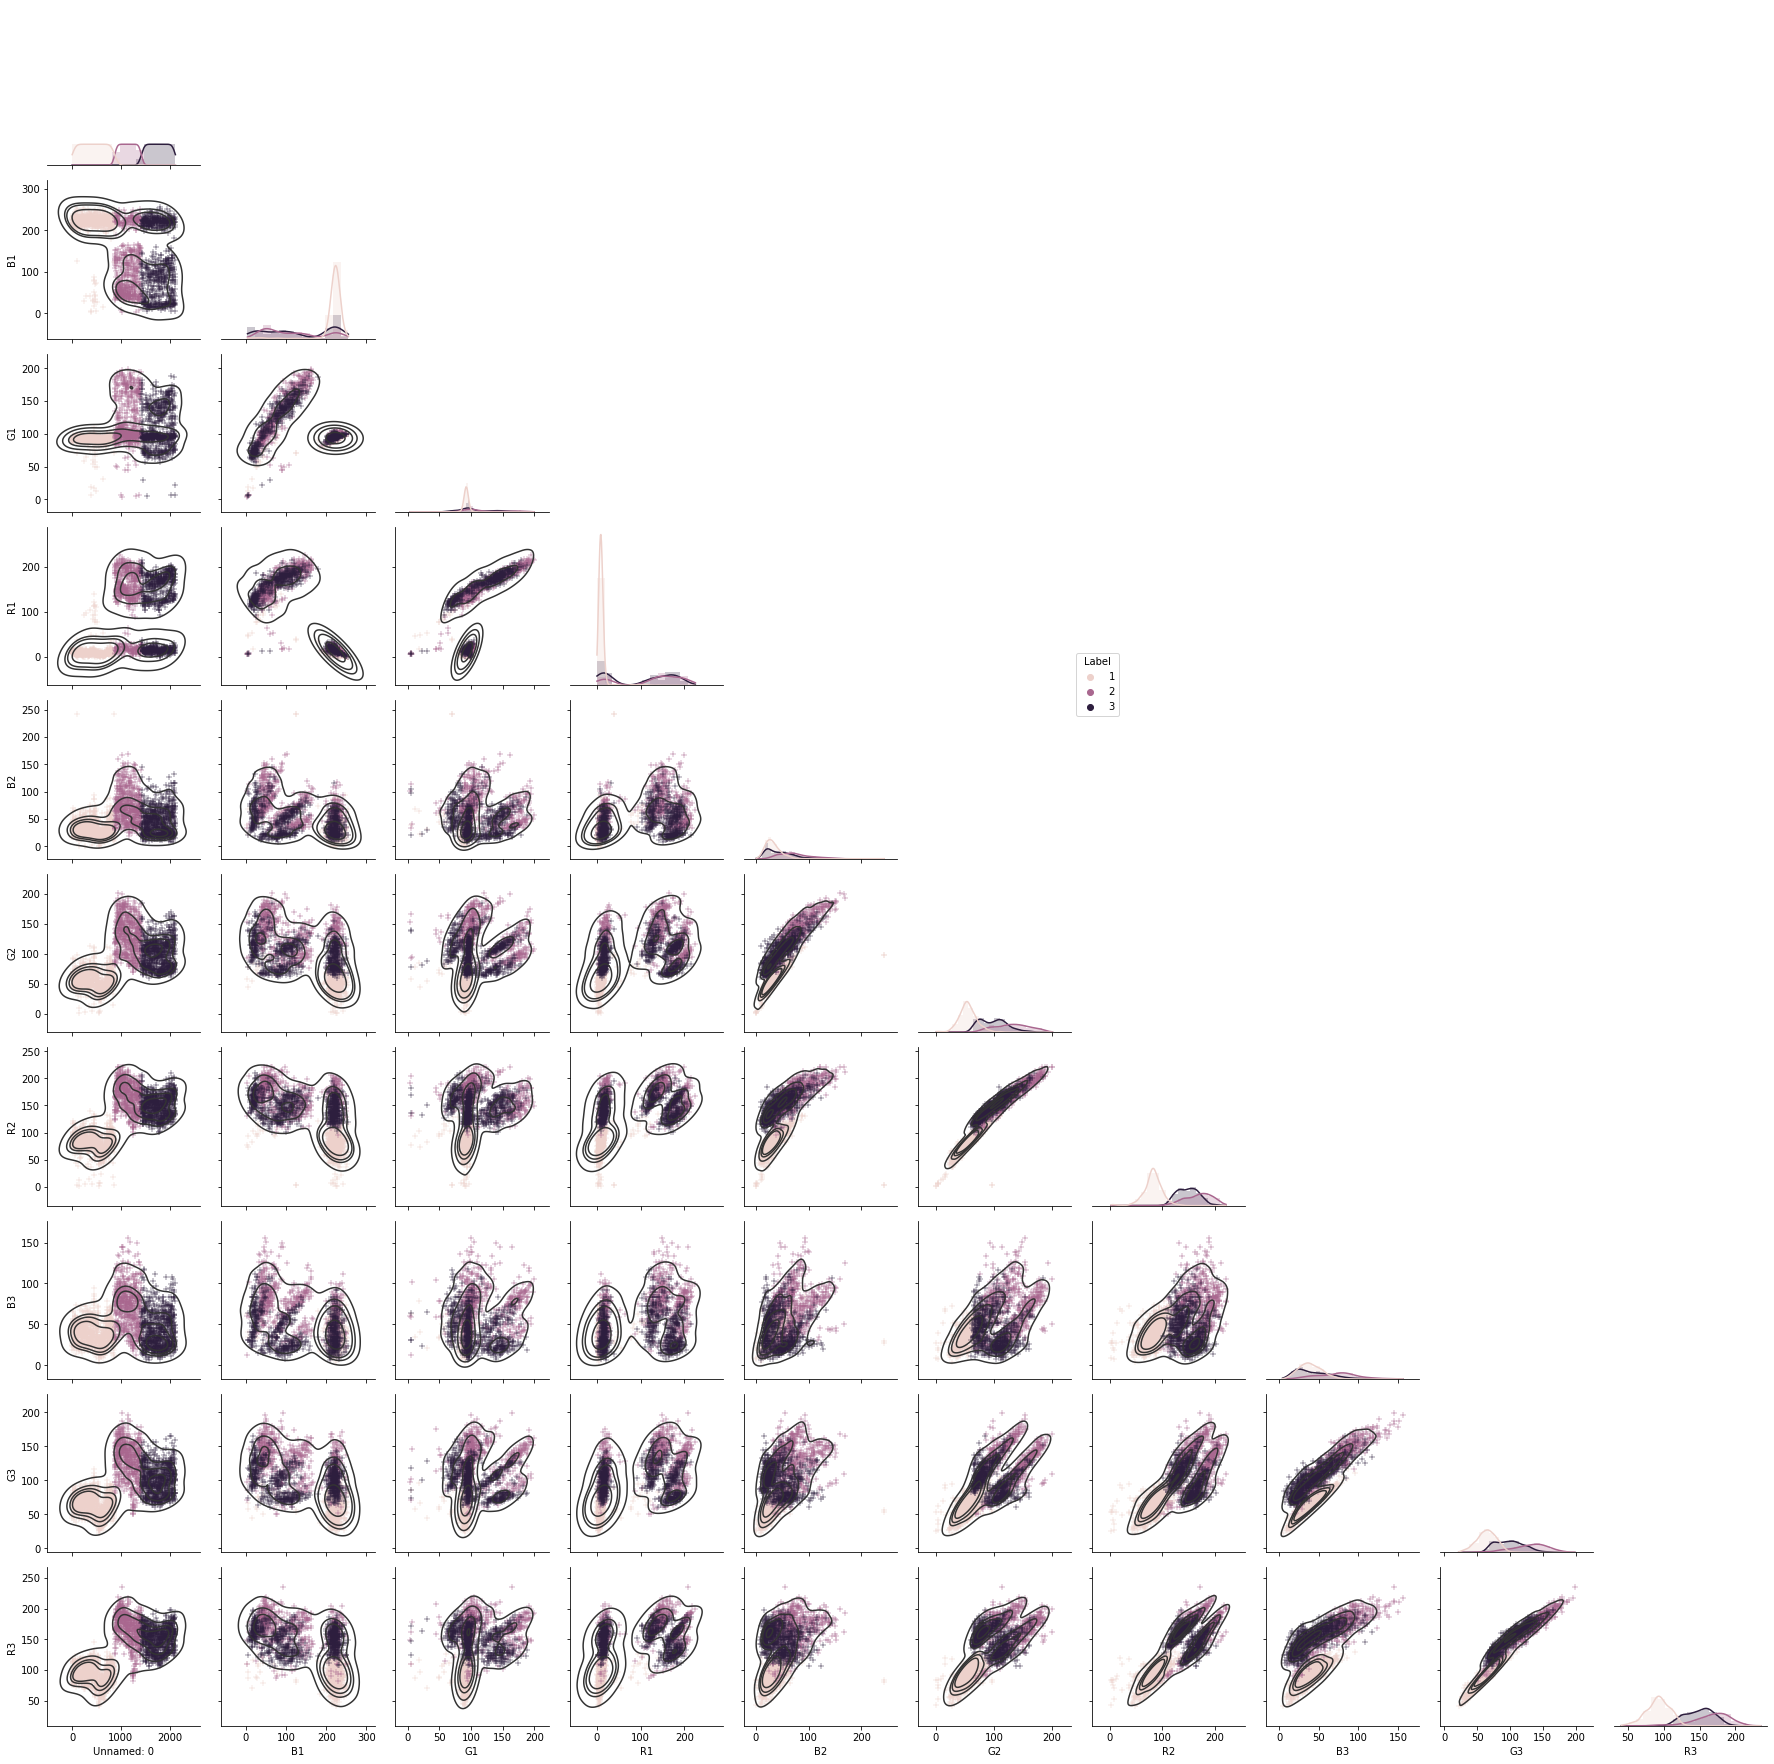

In [26]:
g = sns.PairGrid(df, hue="Label", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))


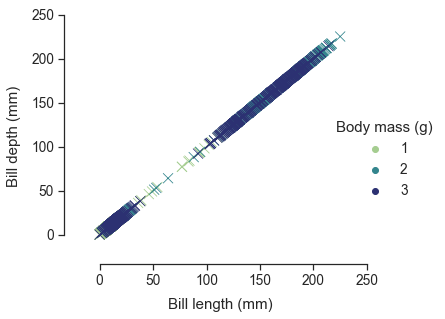

In [28]:
sns.set_theme(style="ticks", font_scale=1.25)
g = sns.relplot(
    data=df,
    x="R1", y="R1", hue="Label",
    palette="crest", marker="x", s=100,
)
g.set_axis_labels("Bill length (mm)", "Bill depth (mm)", labelpad=10)
g.legend.set_title("Body mass (g)")
g.figure.set_size_inches(6.5, 4.5)
g.ax.margins(.15)
g.despine(trim=True)

In [7]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(merge)
X_scaled

array([[-1.17436528, -1.27220694, -0.08925271, -1.07075775],
       [-1.0734873 , -1.15863211,  0.16644156, -1.07075775],
       [-1.08789844, -1.14601269,  0.1814824 , -1.07075775],
       ...,
       [ 1.04495025,  0.06545212, -2.02952105,  1.26204301],
       [ 1.14582823,  0.26736292, -1.78886761,  1.26204301],
       [ 0.98730569,  0.22950464, -1.83399013,  1.26204301]])

In [9]:
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

c:\users\rocks\appdata\local\programs\python\python38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\rocks\appdata\local\programs\python\python38\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [10]:
tsne_repr

array([[ 21.027367, -41.93337 ],
       [ 28.135801, -34.2769  ],
       [ 28.246674, -33.450634],
       ...,
       [ 10.167411,  42.045437],
       [  8.266554,  48.628582],
       [  8.24888 ,  46.984726]], dtype=float32)

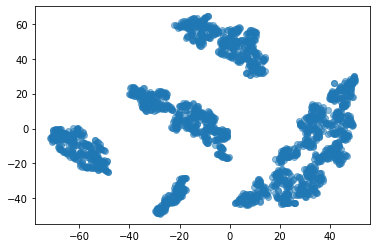

In [13]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=0.5);

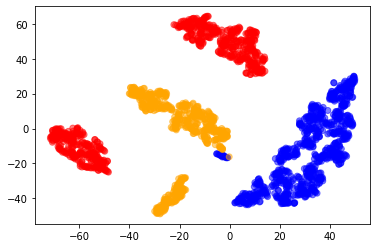

In [16]:
plt.scatter(
    tsne_repr[:, 0],
    tsne_repr[:, 1],
    c=df["Label"].map({1: "blue", 2: "orange", 3:"red"}),
    alpha=0.5,
);

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from joblib import dump, load 
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

df = pd.read_csv("final.csv")
df = df.drop(columns=['Unnamed: 0'])

X=df.iloc[:,:9]
Y=df.iloc[:,9]

from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(df, test_size=0.2)

train_set_feat = train_set.iloc[:,:9]
train_set_label = train_set.iloc[:,9].to_numpy()
test_set_feat = test_set.iloc[:,:9]
test_set_label = test_set.iloc[:,9].to_numpy()


model = RandomForestClassifier(n_estimators= 100 ,max_depth=6,n_jobs=-1,)
model.fit(train_set_feat, np.ravel(train_set_label))
# dump(model, 'Color_Model.joblib') 

y_pred = model.predict(test_set_feat)
# cf_matrix = confusion_matrix(test_set_label, y_pred)
# colormap = sns.color_palette("Reds")
# print(sns.heatmap(cf_matrix, annot=True,cmap=colormap))
fpr, tpr, thresholds = roc_curve(test_set_label, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 

plt.savefig("roc.png")

In [ ]:
prob_test_vec = model.predict_proba(test_set_feat)
from sklearn.metrics import roc_curve, auc, RocCurveDisplay 
n_classes = 3
fpr = [0] * 3
tpr = [0] * 3
thresholds = [0] * 3
auc_score = [0] * 3
 
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(test_set_label[],
                                              prob_test_vec[:, i])
    auc_score[i] = auc(fpr[i], tpr[i])
 
auc_score

In [11]:
from itertools import combinations

pair_list = list(combinations(np.unique(test_set_label), 2))
print(pair_list)
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(train_set_label)
y_onehot_test = label_binarizer.transform(test_set_label)
y_score = model.predict_proba(test_set_feat)

[(1, 2), (1, 3), (2, 3)]


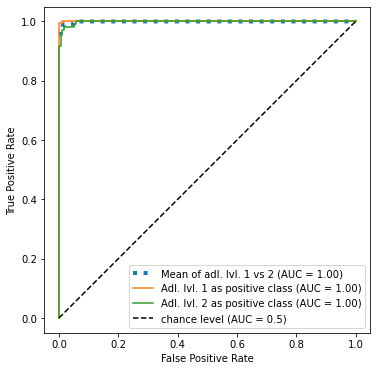

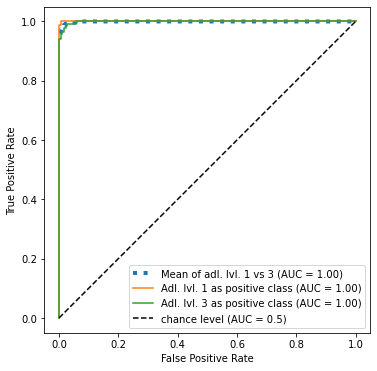

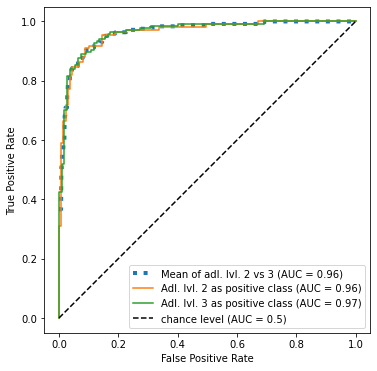

Macro-averaged One-vs-One ROC AUC score:
0.99


In [21]:
pair_scores = []
mean_tpr = dict()
fpr_grid = np.linspace(0.0, 1.0, 1000)
# mean_tpr = np.zeros_like(fpr_grid)

for ix, (label_a, label_b) in enumerate(pair_list):

    a_mask = test_set_label == label_a
    b_mask = test_set_label == label_b
    ab_mask = np.logical_or(a_mask, b_mask)

    a_true = a_mask[ab_mask]
    b_true = b_mask[ab_mask]

    idx_a = np.flatnonzero(label_binarizer.classes_ == label_a)[0]
    idx_b = np.flatnonzero(label_binarizer.classes_ == label_b)[0]

    fpr_a, tpr_a, _ = roc_curve(a_true, y_score[ab_mask, idx_a])
    fpr_b, tpr_b, _ = roc_curve(b_true, y_score[ab_mask, idx_b])

    mean_tpr[ix] = np.zeros_like(fpr_grid)
    mean_tpr[ix] += np.interp(fpr_grid, fpr_a, tpr_a)
    mean_tpr[ix] += np.interp(fpr_grid, fpr_b, tpr_b)
    mean_tpr[ix] /= 2
    mean_score = auc(fpr_grid, mean_tpr[ix])
    pair_scores.append(mean_score)

    fig, ax = plt.subplots(figsize=(6, 6))
    plt.plot(
        fpr_grid,
        mean_tpr[ix],
        label=f"Mean of adl. lvl. {label_a} vs {label_b} (AUC = {mean_score :.2f})",
        linestyle=":",
        linewidth=4,
    )
    RocCurveDisplay.from_predictions(
        a_true,
        y_score[ab_mask, idx_a],
        ax=ax,
        name=f"Adl. lvl. {label_a} as positive class",
    )
    RocCurveDisplay.from_predictions(
        b_true,
        y_score[ab_mask, idx_b],
        ax=ax,
        name=f"Adl. lvl. {label_b} as positive class",
    )
    plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    # plt.title(f"{target_names[idx_a]} vs {label_b} ROC curves")
    plt.legend()
    plt.show()
    

print(f"Macro-averaged One-vs-One ROC AUC score:\n{np.average(pair_scores):.2f}")

In [5]:
test_set_label

array([1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 1, 2, 3, 1, 1, 1, 1, 1, 2,
       1, 3, 1, 1, 1, 3, 1, 2, 2, 1, 3, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3,
       3, 2, 2, 1, 3, 1, 1, 3, 2, 2, 2, 3, 2, 2, 1, 3, 1, 1, 1, 2, 3, 2,
       1, 3, 3, 2, 3, 1, 3, 2, 1, 3, 3, 1, 1, 3, 3, 3, 2, 2, 1, 1, 1, 2,
       3, 1, 1, 3, 2, 3, 3, 2, 3, 2, 1, 1, 3, 1, 3, 1, 2, 3, 1, 3, 1, 1,
       1, 3, 1, 2, 1, 2, 3, 1, 2, 1, 3, 2, 1, 1, 3, 2, 1, 3, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 2, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 3, 2, 1, 1, 2, 1, 2, 1, 3, 3, 3, 3, 3, 2, 3, 2, 1, 3, 3, 1, 1,
       2, 1, 3, 1, 3, 1, 2, 3, 2, 2, 2, 2, 3, 1, 2, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 2, 3, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 1, 1, 3, 1, 1, 3, 3, 1,
       1, 2, 2, 2, 2, 1, 1, 2, 3, 2, 1, 2, 2, 1, 1, 1, 1, 2, 3, 1, 2, 1,
       2, 2, 3, 2, 2, 3, 2, 1, 1, 3, 2, 3, 1, 1, 3, 3, 1, 3, 1, 3, 1, 1,
       1, 1, 2, 1, 2, 1, 3, 1, 3, 3, 3, 1, 1, 2, 3, 1, 1, 3, 3, 1, 2, 1,
       2, 3, 1, 3, 3, 2, 3, 3, 1, 3, 3, 1, 1, 1, 1,

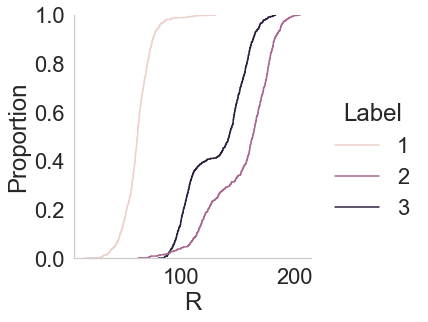

In [25]:
sns.set(font_scale=2)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.displot(merge, x="R", hue="Label", kind="ecdf")
plt.savefig('R_dis.pdf')

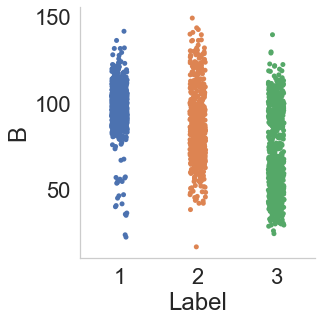

In [24]:
sns.catplot(x="Label", y="B", data = merge)
plt.savefig('B_cat.pdf')

<AxesSubplot:xlabel='R'>

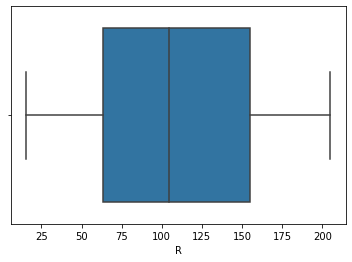

In [4]:
sns.boxplot(x="R", data=merge)

<AxesSubplot:xlabel='G'>

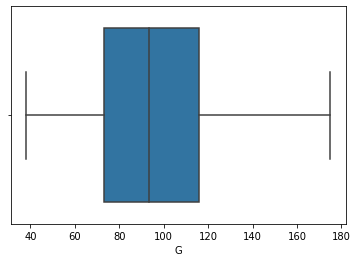

In [5]:
sns.boxplot(x="G", data=merge)

<AxesSubplot:xlabel='B'>

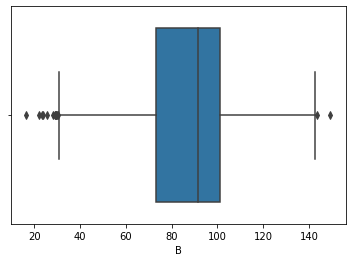

In [6]:
sns.boxplot(x="B", data=merge)

<AxesSubplot:>

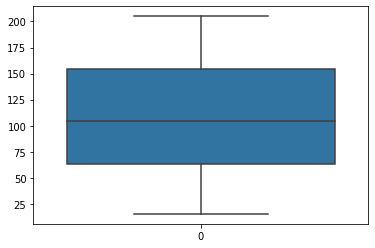

In [14]:
# _, axes = plt.subplots(1,0, sharey=True, figsize=(6, 4))
sns.boxplot(data=merge["R"])

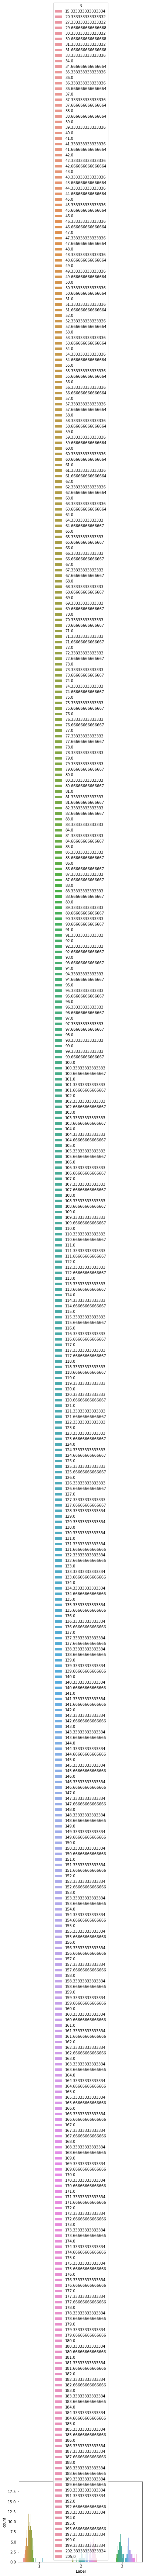

In [5]:
# sns.set()
# %config InlineBackend.figure_format = 'retina'
sns.countplot(x="Label", hue="R", data=merge);


<AxesSubplot:xlabel='Label'>

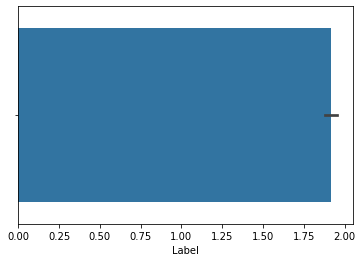

In [8]:
sns.barplot(x="Label", , data = merge)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from plotnine import *

merge['Label'] = merge['Label'].astype("category")

plt1 = ggplot(merge, aes(x='Label', y='R')) + \
    geom_boxplot() + \
    theme(axis_text_x = element_text(size=10, angle=0, hjust=1), panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank(), axis.line = element_line(colour = "black"))

 
ggsave(filename="R_box.png",
       plot=plt1,
       device='png')

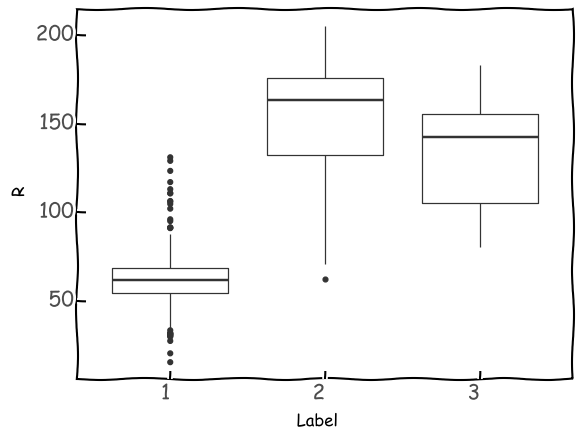

<ggplot: (120464946676)>

In [36]:
plt1 = ggplot(merge, aes(x='Label', y='R')) + \
    geom_boxplot() + \
    theme_xkcd() + \
    theme(axis_text_x = element_text(size=15, angle=0, hjust=1), axis_text_y = element_text(size=15, angle=0, hjust=1))
plt1

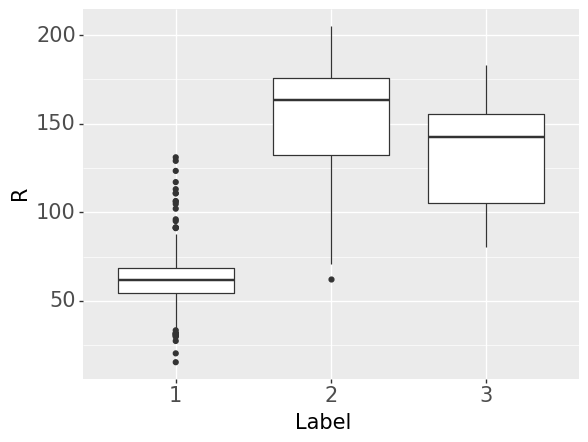

<ggplot: (120465084064)>

In [38]:
plt1 = ggplot(merge, aes(x='Label', y='R')) + \
    geom_boxplot() + \
    theme(text=element_text(size=15))
plt1

In [53]:
plt1 = ggplot(merge, aes(x='Label', y='B')) + \
    geom_boxplot(color='blue') + \
    theme_bw() + \
    theme(text=element_text(size=15, family = "Times New Roman"))


ggsave(filename="B_box.png",
       plot=plt1,
       device='png')